In [ ]:
## FDMS TME3  

Kaggle [How Much Did It Rain? II](https://www.kaggle.com/c/how-much-did-it-rain-ii)

Florian Toque & Paul Willot  

# Dear professor Denoyer...
## Warning  


**This is an early version of our entry for the Kaggle challenge**  

It's still very messy and we send it because we forgot that we had to submit our progress step by step...

**To summarize our goal, we plan to use a RNN to take advantage of the sequential data**

In [1]:
# from __future__ import exam_success
from __future__ import absolute_import
from __future__ import print_function

%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd
import scipy.stats as stats

# Sk cheats
from sklearn.cross_validation import cross_val_score  # cross val
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import Imputer   # get rid of nan

* 13.765.202 lines in train.csv  
*  8.022.757 lines in test.csv  

Reduced to

* 10.000
* 5.000

In [2]:
%%time
filename = "data/reduced_train_100000.csv"
#filename = "data/reduced_test_100000.csv"
raw = pd.read_csv(filename)
raw = raw.set_index('Id')
#train = train.dropna()

CPU times: user 288 ms, sys: 42.7 ms, total: 331 ms
Wall time: 331 ms


In [3]:
l = float(len(raw["minutes_past"]))
comp = []
for i in raw.columns:
    #print(raw"%.03f, %s"%(1-train[i].isnull().sum()/l , i) )
    comp.append([1-raw[i].isnull().sum()/l , i])
comp.sort(key=lambda x: x[0], reverse=True)
comp

[[1.0, 'minutes_past'],
 [1.0, 'radardist_km'],
 [1.0, 'Expected'],
 [0.55457000000000001, 'RefComposite_5x5_90th'],
 [0.53336000000000006, 'Ref_5x5_90th'],
 [0.48194999999999999, 'RefComposite_5x5_50th'],
 [0.48109000000000002, 'RefComposite'],
 [0.45211000000000001, 'Ref_5x5_50th'],
 [0.45076000000000005, 'Ref'],
 [0.42332999999999998, 'RhoHV_5x5_90th'],
 [0.42332999999999998, 'Zdr_5x5_90th'],
 [0.42296, 'RefComposite_5x5_10th'],
 [0.38461999999999996, 'Ref_5x5_10th'],
 [0.36687999999999998, 'Kdp_5x5_90th'],
 [0.36124999999999996, 'RhoHV'],
 [0.36124999999999996, 'Zdr'],
 [0.36097999999999997, 'RhoHV_5x5_50th'],
 [0.36097999999999997, 'Zdr_5x5_50th'],
 [0.31401999999999997, 'Kdp_5x5_50th'],
 [0.31355999999999995, 'Kdp'],
 [0.30947000000000002, 'RhoHV_5x5_10th'],
 [0.30947000000000002, 'Zdr_5x5_10th'],
 [0.26480000000000004, 'Kdp_5x5_10th']]

In [4]:
raw = raw.dropna()

In [5]:
raw.columns

Index([u'minutes_past', u'radardist_km', u'Ref', u'Ref_5x5_10th',
       u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite',
       u'RefComposite_5x5_10th', u'RefComposite_5x5_50th',
       u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th',
       u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th',
       u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th',
       u'Kdp_5x5_50th', u'Kdp_5x5_90th', u'Expected'],
      dtype='object')

In [6]:
i = raw[list([u'Ref', u'Ref_5x5_10th',
       u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite',
       u'RefComposite_5x5_10th', u'RefComposite_5x5_50th',
       u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th',
       u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th',
       u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th',
       u'Kdp_5x5_50th', u'Kdp_5x5_90th'])].dropna(how='all').index

In [7]:
fullna.difference(i)

NameError: name 'fullna' is not defined

In [8]:
idWithNoNan = np.unique(i)

In [9]:
idWithNoNan[:10]

array([ 2, 10, 11, 12, 14, 15, 17, 18, 24, 27])

In [10]:
AllId = np.unique(raw.index)

In [11]:
AllId[:10]

array([ 2, 10, 11, 12, 14, 15, 17, 18, 24, 27])

In [12]:
tr = [burg not in idWithNoNan for burg in AllId]

In [13]:
tmp = []
for idx,i in enumerate(tr):
    if i:
        tmp.append(idx+1)

In [14]:
tmp[-10:]

[]

In [15]:
tttt = AllId*tr

In [16]:
fullna = raw.drop(raw[list([u'Ref', u'Ref_5x5_10th',
       u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite',
       u'RefComposite_5x5_10th', u'RefComposite_5x5_50th',
       u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th',
       u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th',
       u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th',
       u'Kdp_5x5_50th', u'Kdp_5x5_90th'])].dropna(how='all').index).index

In [17]:
fullna.head(100)

AttributeError: 'Int64Index' object has no attribute 'head'

verifier val aberantes sur labels


In [18]:
raw.head(20)

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
2,1,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,...,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016
2,16,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,...,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016
2,21,2,24.5,16.5,21.0,24.5,24.5,21.0,24.0,28.0,...,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994,1.016
2,26,2,12.0,12.0,16.0,20.0,16.5,17.0,19.0,21.0,...,0.998333,0.5625,0.2500,0.4375,0.6875,-1.760010,-1.760010,-0.350006,0.709991,1.016
2,31,2,22.5,19.0,22.0,25.0,26.0,23.5,25.5,27.5,...,1.001667,0.0000,-0.1875,0.2500,0.6250,-1.059998,-2.120010,-0.710007,0.349991,1.016
2,37,2,14.0,14.0,18.5,21.0,19.5,20.0,21.0,23.0,...,0.998333,0.5000,0.1875,0.4375,0.8125,0.000000,-1.760010,-0.350006,1.059998,1.016
2,42,2,12.0,11.0,12.5,17.0,19.5,18.0,21.0,23.0,...,0.998333,0.6250,0.3750,0.6250,0.8750,-0.350006,-0.350006,0.000000,0.349991,1.016
2,47,2,1.5,3.5,7.0,10.5,18.0,16.5,18.5,21.5,...,0.998333,0.3750,0.1875,0.5000,0.6875,0.349991,-2.110001,-0.350006,1.059998,1.016
2,53,2,16.0,14.5,18.0,23.5,28.0,23.5,26.5,29.5,...,0.998333,0.8750,0.6250,0.9375,1.3750,-0.350006,-1.410004,-0.350006,2.119995,1.016


In [19]:
raw["Expected"].describe()

count    22182.000000
mean         4.968538
std         24.314519
min          0.010000
25%          0.508000
50%          2.032001
75%          4.064002
max        675.999400
Name: Expected, dtype: float64

Get rid of Nan value for now

In [20]:
#train_clean = train[[not i for i in np.isnan(train["Ref_5x5_10th"])]]

*Forums indicate that a higher than 1m rainfall is probably an error. Which is quite understandable. We filter that out*

In [21]:
raw = raw[raw['Expected'] < 1000]

In [22]:
raw['Expected'].describe()

count    22182.000000
mean         4.968538
std         24.314519
min          0.010000
25%          0.508000
50%          2.032001
75%          4.064002
max        675.999400
Name: Expected, dtype: float64

In [23]:
split = 0.2
train = raw.tail(int(len(raw)*1-split))
test = raw.tail(int(len(raw)*split))

---

In [24]:
#columns = [u'minutes_past', u'radardist_km', u'Ref', u'Ref_5x5_10th',
#       u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite',
#       u'RefComposite_5x5_10th', u'RefComposite_5x5_50th',
#       u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th',
#       u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th',
#       u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th',
#       u'Kdp_5x5_50th', u'Kdp_5x5_90th']
#columns = [u'radardist_km', u'Ref', u'Ref_5x5_10th']
columns = [ u'radardist_km', u'Ref', u'Ref_5x5_10th',
       u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite',
       u'RefComposite_5x5_10th', u'RefComposite_5x5_50th',
       u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th',
       u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th',
       u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th',
       u'Kdp_5x5_50th', u'Kdp_5x5_90th']
nb_features = len(columns)
data = raw[list(columns)]
data.head(5)

,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
Id,,,,,,,,,,,,,,,,,,,,,
2,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,0.998333,...,0.998333,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998
2,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,0.995000,...,0.998333,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998
2,2,24.5,16.5,21.0,24.5,24.5,21.0,24.0,28.0,0.998333,...,0.998333,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994
2,2,12.0,12.0,16.0,20.0,16.5,17.0,19.0,21.0,0.998333,...,0.998333,0.998333,0.5625,0.2500,0.4375,0.6875,-1.760010,-1.760010,-0.350006,0.709991
2,2,22.5,19.0,22.0,25.0,26.0,23.5,25.5,27.5,0.998333,...,0.998333,1.001667,0.0000,-0.1875,0.2500,0.6250,-1.059998,-2.120010,-0.710007,0.349991


In [25]:
data.describe()

,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
count,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,...,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000
mean,8.708728,27.407402,23.370729,27.380714,31.918673,30.146064,26.749346,30.046186,34.148544,0.979861,...,0.987114,1.005396,0.525558,-0.420262,0.510586,1.681166,0.012703,-3.275430,0.002740,3.861588
std,3.776862,8.055271,7.636181,7.505257,7.749372,7.920248,7.558031,7.480067,7.801069,0.046010,...,0.019343,0.019082,0.969050,0.768905,0.517899,0.851694,2.981235,2.668710,1.036181,2.665749
min,0.000000,-8.000000,-15.500000,-7.500000,-2.500000,-2.000000,-4.000000,0.500000,2.500000,0.208333,...,0.721667,0.948333,-7.875000,-7.875000,-1.250000,-0.437500,-31.029999,-39.839996,-7.380005,-0.350006
25%,6.000000,22.000000,18.000000,22.000000,26.500000,24.500000,21.500000,24.500000,28.500000,0.975000,...,0.978333,0.995000,0.000000,-0.875000,0.187500,1.125000,-1.410004,-4.230011,-0.350006,2.099991
50%,10.000000,27.500000,23.500000,27.500000,32.000000,30.500000,27.000000,30.500000,34.500000,0.991667,...,0.991667,0.998333,0.500000,-0.375000,0.437500,1.562500,0.000000,-2.470001,0.000000,3.169998
75%,12.000000,33.000000,29.000000,32.500000,37.500000,35.500000,32.000000,35.500000,39.500000,0.998333,...,0.998333,1.008333,1.062500,0.062500,0.812500,2.125000,1.409988,-1.410004,0.349991,5.029999
max,15.000000,60.000000,53.000000,56.500000,61.000000,61.500000,59.500000,62.000000,75.500000,1.051667,...,1.051667,1.051667,7.937500,3.437500,4.562500,7.937500,29.979996,1.759994,5.629990,30.989990


In [32]:
data.head(40)

,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
Id,,,,,,,,,,,,,,,,,,,,,
2,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,0.998333,...,0.998333,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998
2,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,0.995000,...,0.998333,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998
2,2,24.5,16.5,21.0,24.5,24.5,21.0,24.0,28.0,0.998333,...,0.998333,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994
2,2,12.0,12.0,16.0,20.0,16.5,17.0,19.0,21.0,0.998333,...,0.998333,0.998333,0.5625,0.2500,0.4375,0.6875,-1.760010,-1.760010,-0.350006,0.709991
2,2,22.5,19.0,22.0,25.0,26.0,23.5,25.5,27.5,0.998333,...,0.998333,1.001667,0.0000,-0.1875,0.2500,0.6250,-1.059998,-2.120010,-0.710007,0.349991
2,2,14.0,14.0,18.5,21.0,19.5,20.0,21.0,23.0,0.998333,...,0.998333,0.998333,0.5000,0.1875,0.4375,0.8125,0.000000,-1.760010,-0.350006,1.059998
2,2,12.0,11.0,12.5,17.0,19.5,18.0,21.0,23.0,0.998333,...,0.998333,0.998333,0.6250,0.3750,0.6250,0.8750,-0.350006,-0.350006,0.000000,0.349991
2,2,1.5,3.5,7.0,10.5,18.0,16.5,18.5,21.5,0.998333,...,0.998333,0.998333,0.3750,0.1875,0.5000,0.6875,0.349991,-2.110001,-0.350006,1.059998
2,2,16.0,14.5,18.0,23.5,28.0,23.5,26.5,29.5,0.998333,...,0.998333,0.998333,0.8750,0.6250,0.9375,1.3750,-0.350006,-1.410004,-0.350006,2.119995


In [27]:
#%%time
#max_padding = 20
docX, docY = [], []
for i in train.index.unique():
    if isinstance(train.loc[i],pd.core.series.Series):
        m = [data.loc[i].as_matrix()]
        #pad = np.pad(m, ((max_padding -len(m), 0),(0,0)), 'constant')  # pre-padding
        docX.append(m)
        docY.append(float(train.loc[i]["Expected"]))
    else:
        m = data.loc[i].as_matrix()
        #pad = np.pad(m, ((max_padding -len(m), 0),(0,0)), 'constant')
        docX.append(m)
        docY.append(float(train.loc[i][:1]["Expected"]))
    #docY.append(train.loc[i][:1]["Expected"].as_matrix)
X = np.array(docX)
y = np.array(docY)

In [33]:
train.index.unique()

array([   2,   10,   11, ..., 9534, 9537, 9538])

In [28]:
np.shape(X)

(3093,)

In [31]:
X[2]

array([[ 12.        ,  21.        ,  16.5       ,  20.        ,
         23.        ,  21.        ,  16.5       ,  20.        ,
         23.        ,   0.9816667 ,   0.9483333 ,   0.9816667 ,
          1.015     ,  -0.4375    ,  -0.4375    ,   0.25      ,
          0.875     ,  -1.4100037 ,  -1.7600098 ,   1.0599976 ,   3.8799896 ],
       [ 12.        ,  23.5       ,  22.        ,  24.5       ,
         26.5       ,  23.5       ,  22.        ,  24.5       ,
         26.5       ,   0.96166664,   0.9716667 ,   0.995     ,
          1.0016667 ,   0.5625    ,  -0.125     ,   0.25      ,
          0.75      ,   0.70999146,  -2.4700012 ,   0.        ,   2.119995  ],
       [ 12.        ,  20.        ,  17.        ,  19.5       ,
         23.        ,  20.        ,  17.        ,  19.5       ,
         23.        ,   0.9916667 ,   0.9816667 ,   0.9916667 ,
          1.0016667 ,   0.0625    ,  -0.3125    ,   0.0625    ,
          0.5625    ,  -1.0599976 ,  -2.1100006 ,  -1.0599976 ,   1.759994

In [76]:
tmp = []
for i in X:
    tmp.append(len(i))
tmp = np.array(tmp)
pd.DataFrame(tmp).describe()

,0
count,3093.000000
mean,7.171678
std,4.077350
min,1.000000
25%,3.000000
50%,7.000000
75%,11.000000
max,17.000000


[]

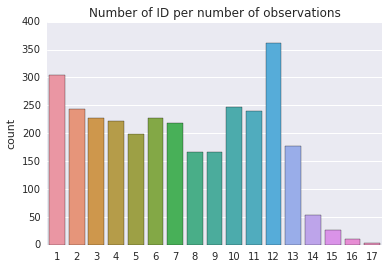

In [77]:
sns.countplot(tmp,order=range(tmp.min(),tmp.max()+1))
plt.title("Number of ID per number of observations")
plt.plot()

In [78]:
dicPerObs = {}
for idx,i in enumerate(X):
    l = len(i)
    try:
        dicPerObs[str(l)].append(y[idx])
    except KeyError:
        dicPerObs[str(l)]=[y[idx]]

In [79]:
for i in dicPerObs.keys():
    t = np.array(dicPerObs[i])
    print(t.mean())

6.37533685447
6.38571188787
2.83594497488
4.59996362069
2.82727073692
3.18313371868
2.4610012875
3.6582018897
2.72445389494
3.89044256211
3.96179717631
8.55662565268
4.10540307458
4.62757588325
5.20726262813
3.93978647865
6.98574044808


In [80]:
dicPerObs = {}
for idx,i in enumerate(X):
    l = len(i)
    try:
        dicPerObs[str(l)].append(np.count_nonzero(~np.isnan(i)) / float(i.size))
    except KeyError:
        dicPerObs[str(l)]=[np.count_nonzero(~np.isnan(i)) / float(i.size)]

AttributeError: 'list' object has no attribute 'size'

In [81]:
# percentage of data filled
# the more the less sparse
for i in dicPerObs.keys():
    t = np.array(dicPerObs[i])
    print(t.mean())

1.0
1.0
1.0
1.0
1.0


NameError: name 'tmp2' is not defined

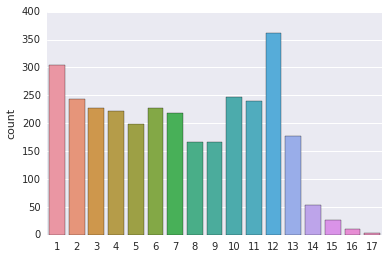

In [82]:
sns.countplot(tmp,order=range(tmp.min(),tmp.max()+1),zorder=1)
sns.countplot(tmp2,order=range(tmp.min(),tmp.max()+1),zorder=10)
plt.title("Number of ID per number of obesrvations")
plt.plot()

In [83]:
XX = [np.array(t).mean(0) for t in X]

In [84]:
#XX[0]

In [85]:
np.shape(XX)

(3093, 21)

In [86]:
global_means = np.nanmean(data,0)
##global_means = data.mean(0).values

t = []
for i in XX:
    t.append(np.count_nonzero(~np.isnan(i)) / float(i.size))
pd.DataFrame(np.array(t)).describe()

In [87]:
XX = []
for i in X:
    nm = np.nanmean(i,0)
    for idx,j in enumerate(nm):
        if np.isnan(j):
            nm[idx]=global_means[idx]
    XX.append(np.array(nm))

In [88]:
XX = [np.array(t).mean(0) for t in X]

In [89]:
split = 0.2
ps = int(len(XX) * (1-split))
X_train = XX[:ps]
y_train = y[:ps]
X_test = XX[ps:]
y_test = y[ps:]

In [90]:
etreg = ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=1, random_state=0)

In [91]:
%%time
etreg.fit(X_train,y_train)

CPU times: user 877 ms, sys: 25.1 ms, total: 903 ms
Wall time: 898 ms


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=1, min_weight_fraction_leaf=0.0,
          n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
          verbose=0, warm_start=False)

In [92]:
%%time
et_score = cross_val_score(etreg, XX, y, cv=5)
 
print("Features: %s\nScore: %s\tMean: %.03f"%(columns, et_score,et_score.mean()))

Features: [u'radardist_km', u'Ref', u'Ref_5x5_10th', u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite', u'RefComposite_5x5_10th', u'RefComposite_5x5_50th', u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th', u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th', u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th', u'Kdp_5x5_50th', u'Kdp_5x5_90th']
Score: [ 0.51407557  0.15938088  0.69138431  0.09297001  0.00505057]	Mean: 0.293
CPU times: user 4.49 s, sys: 72.9 ms, total: 4.57 s
Wall time: 4.59 s


In [93]:
err = (etreg.predict(X_test)-y_test)**2
err.sum()/len(err)

216.45597252585003

---

In [94]:
def marshall_palmer(ref, minutes_past):
    #print("Estimating rainfall from {0} observations".format(len(minutes_past)))
    # how long is each observation valid?
    valid_time = np.zeros_like(minutes_past)
    valid_time[0] = minutes_past.iloc[0]
    for n in xrange(1, len(minutes_past)):
        valid_time[n] = minutes_past.iloc[n] - minutes_past.iloc[n-1]
    valid_time[-1] = valid_time[-1] + 60 - np.sum(valid_time)
    valid_time = valid_time / 60.0

    # sum up rainrate * validtime
    sum = 0
    for dbz, hours in zip(ref, valid_time):
        # See: https://en.wikipedia.org/wiki/DBZ_(meteorology)
        if np.isfinite(dbz):
            mmperhr = pow(pow(10, dbz/10)/200, 0.625)
            sum = sum + mmperhr * hours
    return sum


def simplesum(ref,hour):
    hour.sum()

# each unique Id is an hour of data at some gauge
def myfunc(hour):
    #rowid = hour['Id'].iloc[0]
    # sort hour by minutes_past
    hour = hour.sort('minutes_past', ascending=True)
    est = marshall_palmer(hour['Ref'], hour['minutes_past'])
    return est

In [95]:
estimates = raw.groupby(raw.index).apply(myfunc)
estimates.head(20)

Id
2      0.448765
10     5.103416
11     0.599822
12     4.399598
14     0.403563
15     0.522524
17     0.906720
18     0.614962
24     6.483500
27     4.939502
29     0.529641
32     0.947299
33     4.238946
34     1.339219
38     2.557478
41     4.407576
51    16.523660
56     1.038116
58     1.489662
62     8.366335
dtype: float64

In [96]:
err = (estimates-(np.hstack((y_train,y_test))))**2
err.sum()/len(err)

550.24441384929003

---

_Memento  (mauri)_

---


---

In [66]:
etreg = ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=1, random_state=0)

In [67]:
"""
columns = train_clean.columns
columns = ["minutes_past","radardist_km","Ref","Ref_5x5_10th", "Ref_5x5_50th"]
columns = [u'Id', u'minutes_past', u'radardist_km', u'Ref', u'Ref_5x5_10th',
       u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite',
       u'RefComposite_5x5_10th', u'RefComposite_5x5_50th',
       u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th',
       u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th',
       u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th',
       u'Kdp_5x5_50th', u'Kdp_5x5_90th', u'Expected']
"""
columns = [u'minutes_past', u'radardist_km', u'Ref', u'Ref_5x5_10th',
       u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite',
       u'RefComposite_5x5_10th', u'RefComposite_5x5_50th',
       u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th',
       u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th',
       u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th',
       u'Kdp_5x5_50th', u'Kdp_5x5_90th']
 
labels = train["Expected"].values
features = train[list(columns)].values

In [68]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(features)
features_trans = imp.transform(features)

In [69]:
len(features_trans)

22182

In [70]:
split = 0.2
ps = int(len(features_trans) * split)
ftrain = features_trans[:ps]
ltrain = labels[:ps]
ftest = features_trans[ps:]
ltest = labels[ps:]

In [71]:
%%time
etreg.fit(ftrain,ltrain)

CPU times: user 1.9 s, sys: 43.6 ms, total: 1.94 s
Wall time: 1.95 s


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=1, min_weight_fraction_leaf=0.0,
          n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
          verbose=0, warm_start=False)

In [72]:
def scorer(estimator, X, y):
    return (estimator.predict(X[0])-y)**2

In [57]:
%%time
et_score = cross_val_score(etreg, features_trans, labels, cv=3)
 
print("Features: %s\nScore: %s\tMean: %.03f"%(columns, et_score,et_score.mean()))

KeyboardInterrupt: 

In [73]:
r = random.randrange(len(ltrain))
print(r)
print(etreg.predict(ftrain[r]))
print(ltrain[r])

2590
[ 2.7940013]
2.7940013


In [94]:
r = random.randrange(len(ltest))
print(r)
print(etreg.predict(ftest[r]))
print(ltest[r])

9219
[ 4.71356263]
0.25400013


In [95]:
err = (etreg.predict(ftest)-ltest)**2

In [96]:
err.sum()/len(err)

625.80234972451899

---

Submit

---

In [154]:
filename = "data/reduced_test_5000.csv"
test = pd.read_csv(filename)

In [164]:
columns = [u'minutes_past', u'radardist_km', u'Ref', u'Ref_5x5_10th',
       u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite',
       u'RefComposite_5x5_10th', u'RefComposite_5x5_50th',
       u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th',
       u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th',
       u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th',
       u'Kdp_5x5_50th', u'Kdp_5x5_90th']
features = test[list(columns)].values

In [165]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(features)
features_trans = imp.transform(features)

In [166]:
fall = test[test.columns].values

In [177]:
fall[20]

array([  2.,  12.,  15.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan])

In [173]:
features_trans[0]

array([  1.        ,   8.        ,  22.41518913,  19.80155642,
        22.10491607,  14.        ,  24.05639308,  21.99042553,
        23.72933182,  15.        ,   0.98224537,   0.93533269,
         0.98130561,   1.01558046,   0.47618814,  -0.66830184,
         0.24352433,   1.84881703,   0.33119267,  -3.23234445,
        -0.39269493,   3.89739166])

In [188]:
i = 1
pred = 0
while fall[i][0] == 1:
    #print(fall[i])
    pred+=etreg.predict(features_trans[i])[0]
    #print(etreg.predict(features_trans[i])[0])
    i+=1
print(i)

17


In [192]:
fall[-1][0]

460.0

In [202]:
%%time
res=[]
i=0
while i<len(fall) and i < 10000:
    pred = 0
    lenn = 0
    curr=fall[i][0]
    while i<len(fall) and fall[i][0] == curr:
        #print(fall[i])
        pred+=etreg.predict(features_trans[i])[0]
        #print(etreg.predict(features_trans[i])[0])
        i+=1
        lenn += 1
    res.append((curr,pred/lenn))
    #i+=1
    #print(i)

CPU times: user 11.9 s, sys: 47.2 ms, total: 11.9 s
Wall time: 12 s


In [199]:
len(res)

460

In [203]:
res[:10]

[(1.0, 2.1142275617605883),
 (2.0, 1.0368167780596871),
 (3.0, 6.6831796034460016),
 (4.0, 7.0145211283436399),
 (5.0, 2.3839445058508328),
 (6.0, 3.2730617268046158),
 (7.0, 4.1804031388372724),
 (8.0, 1.9472981445571425),
 (9.0, 1.0272548098142853),
 (10.0, 8.0115426694183345)]

In [97]:
def myfunc(hour):
    #rowid = hour['Id'].iloc[0]
    # sort hour by minutes_past
    hour = hour.sort('minutes_past', ascending=True)
    #est = (hour['Id'],random.random())
    est = random.random()
    return est

In [98]:
def marshall_palmer(ref, minutes_past):
    #print("Estimating rainfall from {0} observations".format(len(minutes_past)))
    # how long is each observation valid?
    valid_time = np.zeros_like(minutes_past)
    valid_time[0] = minutes_past.iloc[0]
    for n in xrange(1, len(minutes_past)):
        valid_time[n] = minutes_past.iloc[n] - minutes_past.iloc[n-1]
    valid_time[-1] = valid_time[-1] + 60 - np.sum(valid_time)
    valid_time = valid_time / 60.0

    # sum up rainrate * validtime
    sum = 0
    for dbz, hours in zip(ref, valid_time):
        # See: https://en.wikipedia.org/wiki/DBZ_(meteorology)
        if np.isfinite(dbz):
            mmperhr = pow(pow(10, dbz/10)/200, 0.625)
            sum = sum + mmperhr * hours
    return sum


def simplesum(ref,hour):
    hour.sum()

# each unique Id is an hour of data at some gauge
def myfunc(hour):
    #rowid = hour['Id'].iloc[0]
    # sort hour by minutes_past
    hour = hour.sort('minutes_past', ascending=True)
    est = marshall_palmer(hour['Ref'], hour['minutes_past'])
    return est

In [122]:
estimates = test.groupby(train.index).apply(myfunc)
estimates.head(20)

NameError: name 'test' is not defined

In [123]:
estimates = train.groupby(train.index).apply(myfunc)
estimates.head(20)

Id
1     0.000000
2     0.630814
3     0.000000
4     2.717599
5     0.000000
6     0.000000
7     0.040640
8     0.701645
9     0.000000
10    5.103416
11    0.599822
12    4.399598
13    0.000000
14    0.245304
15    0.390208
16    0.000000
17    0.906720
18    0.353654
19    0.202986
20    0.000000
dtype: float64

In [100]:
train["Expected"].head(20)

Id
2     1.016
2     1.016
2     1.016
2     1.016
2     1.016
2     1.016
2     1.016
2     1.016
2     1.016
10    0.010
10    0.010
10    0.010
10    0.010
10    0.010
10    0.010
10    0.010
10    0.010
10    0.010
10    0.010
10    0.010
Name: Expected, dtype: float64

In [102]:
print(features_trans[0])
print(etreg.predict(features_trans[0]))

[  1.           2.           9.           5.           7.5         10.5
  15.          10.5         16.5         23.5          0.99833333
   0.99833333   0.99833333   0.99833333   0.375       -0.125        0.3125
   0.875        1.0599976   -1.4100037   -0.3500061    1.0599976 ]
[ 1.0160005]


In [16]:
def marshall_palmer(data):
    res=[]
    for n in data:
        res.append(etreg.predict(n)[0])
    return np.array(res).mean()


def simplesum(ref,hour):
    hour.sum()

def myfunc(hour):
    hour = hour.sort('minutes_past', ascending=True)
    est = marshall_palmer(hour[train.columns])
    return est

In [302]:
estimates = train_clean.groupby(train_clean.index).apply(myfunc)
estimates.head(20)

ValueError: could not convert string to float: minutes_past

---

RNN


---

In [134]:
import pandas as pd  
from random import random

flow = (list(range(1,10,1)) + list(range(10,1,-1)))*1000  
pdata = pd.DataFrame({"a":flow, "b":flow})  
pdata.b = pdata.b.shift(9)  
data = pdata.iloc[10:] * random()  # some noise  


In [135]:
#columns = [u'minutes_past', u'radardist_km', u'Ref', u'Ref_5x5_10th',
#       u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite',
#       u'RefComposite_5x5_10th', u'RefComposite_5x5_50th',
#       u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th',
#       u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th',
#       u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th',
#       u'Kdp_5x5_50th', u'Kdp_5x5_90th']
columns = [u'radardist_km', u'Ref', u'Ref_5x5_10th']
nb_features = len(columns)
data = train[list(columns)]
data.head(10)

,radardist_km,Ref,Ref_5x5_10th
Id,,,
2,2,9.0,5.0
2,2,18.0,14.0
2,2,24.5,16.5
2,2,12.0,12.0
2,2,22.5,19.0
2,2,14.0,14.0
2,2,12.0,11.0
2,2,1.5,3.5
2,2,16.0,14.5


In [136]:
data.iloc[0].as_matrix()

array([ 2.,  9.,  5.])

In [137]:
train.head(5)

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
2,1,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,...,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016
2,16,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,...,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016
2,21,2,24.5,16.5,21.0,24.5,24.5,21.0,24.0,28.0,...,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994,1.016
2,26,2,12.0,12.0,16.0,20.0,16.5,17.0,19.0,21.0,...,0.998333,0.5625,0.2500,0.4375,0.6875,-1.760010,-1.760010,-0.350006,0.709991,1.016
2,31,2,22.5,19.0,22.0,25.0,26.0,23.5,25.5,27.5,...,1.001667,0.0000,-0.1875,0.2500,0.6250,-1.059998,-2.120010,-0.710007,0.349991,1.016


In [138]:
train.loc[11]

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
11,1,12,21.0,16.5,20.0,23.0,21.0,16.5,20.0,23.0,...,1.015000,-0.4375,-0.4375,0.2500,0.8750,-1.410004,-1.760010,1.059998,3.879990,2.540001
11,10,12,23.5,22.0,24.5,26.5,23.5,22.0,24.5,26.5,...,1.001667,0.5625,-0.1250,0.2500,0.7500,0.709991,-2.470001,0.000000,2.119995,2.540001
11,20,12,20.0,17.0,19.5,23.0,20.0,17.0,19.5,23.0,...,1.001667,0.0625,-0.3125,0.0625,0.5625,-1.059998,-2.110001,-1.059998,1.759994,2.540001
11,29,12,16.5,16.5,19.0,23.0,16.5,16.5,19.0,23.0,...,0.998333,0.0000,-0.6875,0.1250,0.9375,-3.169998,-3.169998,0.709991,2.470001,2.540001
11,39,12,20.0,16.5,18.5,21.5,20.0,16.5,18.5,21.5,...,1.021667,0.6875,-0.3750,0.3125,1.2500,-1.340012,-1.360001,-0.350006,1.759994,2.540001
11,49,12,19.0,18.0,19.5,22.0,19.0,18.0,19.5,22.0,...,1.035000,1.4375,-0.6250,0.1875,1.3125,-3.169998,-3.169998,-1.059998,3.509994,2.540001
11,58,12,15.0,15.0,18.5,22.5,15.0,15.0,18.5,22.5,...,1.008333,1.0625,-0.4375,0.1875,1.0625,-0.710007,-3.169998,-0.350006,1.759994,2.540001


In [139]:
train.loc[11][:1]["Expected"].as_matrix

<bound method Series.as_matrix of Id
11    2.540001
Name: Expected, dtype: float64>

In [140]:
#train.index.unique()

In [141]:
def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1):  
    ntrn = round(len(df) * (1 - test_size))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])
    
    return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = train_test_split(data)

In [142]:
np.shape(X_train)

(19864, 100, 3)

In [144]:
t = np.array([2,1])
t.shape = (1,2)
t.tolist()[0]

[2, 1]

In [145]:
np.shape(t)

(1, 2)

In [146]:
X_train[:2,:2]

array([[[  2. ,   9. ,   5. ],
        [  2. ,  18. ,  14. ]],

       [[  2. ,  18. ,  14. ],
        [  2. ,  24.5,  16.5]]])

In [44]:
train.index.unique()

array([  2,  10,  11,  12,  14,  15,  17,  18,  24,  27,  29,  32,  33,
        34,  38,  41,  51,  56,  58,  62,  69,  72,  73,  74,  77,  78,
        87,  90,  92,  94,  98, 102, 103, 104, 105, 106, 111, 117, 123,
       127, 128, 133, 135, 136, 139, 144, 145, 151, 153, 155, 156, 160,
       163, 164, 166, 174, 177, 178, 184, 186, 188, 189, 191, 192, 193,
       198, 200, 206, 208, 210, 219, 220, 221, 224, 225, 226, 227, 230,
       237, 240, 243, 245, 246, 249, 250, 251, 254, 255, 261, 263, 265,
       266, 269, 274, 276, 279, 280, 284, 285, 288, 289, 291, 300, 302,
       304, 309, 310, 316, 322, 325, 327, 330, 332, 335, 336, 340, 341,
       344, 345, 347, 348, 350, 353, 358, 361, 362, 364, 365, 366, 368,
       369, 371, 373, 379, 382, 390, 391, 396, 402, 403, 404, 405, 406,
       410, 411, 416, 418, 425, 429, 431, 432, 436, 438, 442, 443, 445,
       451, 453, 462, 465, 474, 475, 476, 483, 489, 495, 500, 502, 506,
       521, 523, 527, 531, 539, 541, 545, 546, 547, 548, 551, 55

In [148]:
max_padding = 20

In [149]:
%%time

docX, docY = [], []
for i in train.index.unique():
    if isinstance(train.loc[i],pd.core.series.Series):
        m = [data.loc[i].as_matrix()]
        pad = np.pad(m, ((max_padding -len(m), 0),(0,0)), 'constant')  # pre-padding
        docX.append(pad)
        docY.append(float(train.loc[i]["Expected"]))
    else:
        m = data.loc[i].as_matrix()
        pad = np.pad(m, ((max_padding -len(m), 0),(0,0)), 'constant')
        docX.append(pad)
        docY.append(float(train.loc[i][:1]["Expected"]))
    #docY.append(train.loc[i][:1]["Expected"].as_matrix)
XX = np.array(docX)
yy = np.array(docY)

CPU times: user 2.14 s, sys: 16.5 ms, total: 2.16 s
Wall time: 2.2 s


In [151]:
np.shape(XX)

(3093, 20, 3)

In [154]:
XX[0].mean()

4.2833333333333332

In [36]:
#from keras.preprocessing import sequence
#sequence.pad_sequences(X_train, maxlen=maxlen)

In [37]:
def _load_data(data):  
    """
    data should be pd.DataFrame()
    """
    docX, docY = [], []
    for i in data.index.unique():
        #np.pad(tmp, ((0, max_padding -len(tmp) ),(0,0)), 'constant')
        m = data.loc[i].as_matrix()
        pad = np.pad(m, ((0, max_padding -len(m) ),(0,0)), 'constant')
        docX.append(pad)
        if isinstance(train.loc[i],pd.core.series.Series):
            docY.append(float(train.loc[i]["Expected"]))
        else:
            docY.append(float(train.loc[i][:1]["Expected"]))
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1):  
    ntrn = round(len(df) * (1 - test_size))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])
    
    return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = train_test_split(train)

ValueError: Unable to create correctly shaped tuple from ((0, -3), (0, 0))

In [38]:
len(X_train[0])

100

In [39]:
train.head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
2,1,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,...,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016
2,16,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,...,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016
2,21,2,24.5,16.5,21.0,24.5,24.5,21.0,24.0,28.0,...,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994,1.016
2,26,2,12.0,12.0,16.0,20.0,16.5,17.0,19.0,21.0,...,0.998333,0.5625,0.2500,0.4375,0.6875,-1.760010,-1.760010,-0.350006,0.709991,1.016
2,31,2,22.5,19.0,22.0,25.0,26.0,23.5,25.5,27.5,...,1.001667,0.0000,-0.1875,0.2500,0.6250,-1.059998,-2.120010,-0.710007,0.349991,1.016


In [40]:
X_train[0][:10]

array([[  2. ,   9. ,   5. ],
       [  2. ,  18. ,  14. ],
       [  2. ,  24.5,  16.5],
       [  2. ,  12. ,  12. ],
       [  2. ,  22.5,  19. ],
       [  2. ,  14. ,  14. ],
       [  2. ,  12. ,  11. ],
       [  2. ,   1.5,   3.5],
       [  2. ,  16. ,  14.5],
       [ 10. ,  32.5,  32. ]])

In [41]:
yt = []
for i in y_train:
    yt.append([i[0]])

In [42]:
yt[0]

[5.0]

In [439]:
X_train.shape

(16091, 100, 2)

In [450]:
len(fea[0])

21

In [449]:
len(X_train[0][0])

2

In [442]:
f = np.array(fea)

In [443]:
f.shape()

TypeError: 'tuple' object is not callable

In [428]:
#(X_train, y_train), (X_test, y_test) = train_test_split(data)  # retrieve data

# and now train the model
# batch_size should be appropriate to your memory size
# number of epochs should be higher for real world problems
model.fit(X_train, yt, batch_size=450, nb_epoch=2, validation_split=0.05)  

Train on 15286 samples, validate on 805 samples
Epoch 0
15286/15286 [==============================] - 11s - loss: 1.4571 - val_loss: 0.5908
Epoch 1
15286/15286 [==============================] - 10s - loss: 0.4297 - val_loss: 0.3123


In [37]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding

In [38]:
%%time
input_dim = nb_features
out_dim = 1  
hidden_dim = 200

model = Sequential()
#Embedding(input_dim, hidden_dim, mask_zero=True)
#model.add(LSTM(hidden_dim, hidden_dim, return_sequences=False))  
model.add(LSTM(input_dim, hidden_dim, return_sequences=False))  
model.add(Dropout(0.5))
model.add(Dense(hidden_dim, out_dim))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop")  

CPU times: user 50 s, sys: 1.49 s, total: 51.5 s
Wall time: 1min 26s


In [39]:
model.fit(XX, yy, batch_size=10, nb_epoch=10, validation_split=0.1)  

Train on 267 samples, validate on 30 samples
Epoch 0
267/267 [==============================] - 1s - loss: 117.1316 - val_loss: 14.7827
Epoch 1
267/267 [==============================] - 1s - loss: 113.4763 - val_loss: 14.4738
Epoch 2
267/267 [==============================] - 1s - loss: 112.2433 - val_loss: 14.5549
Epoch 3
267/267 [==============================] - 1s - loss: 112.4863 - val_loss: 14.5511
Epoch 4
267/267 [==============================] - 1s - loss: 111.3677 - val_loss: 14.3697
Epoch 5
267/267 [==============================] - 1s - loss: 110.7156 - val_loss: 14.8054
Epoch 6
267/267 [==============================] - 1s - loss: 109.8483 - val_loss: 14.7823
Epoch 7
267/267 [==============================] - 1s - loss: 110.5945 - val_loss: 14.7577
Epoch 8
267/267 [==============================] - 1s - loss: 110.7163 - val_loss: 14.7414
Epoch 9
267/267 [==============================] - 1s - loss: 110.0546 - val_loss: 15.0051


In [131]:
test = random.randint(0,len(XX))
print(model.predict(XX[test:test+1])[0][0])
print(yy[test])

5.88562275325
5.334003
